In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = pd.read_csv('../application_data/cleaned_data_before_transform.csv')
df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,TARGET,WEEKDAY_APPR_PROCESS_START,IS_EMPLOYED
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.018801,2,2,0,0,0,0,1,WEDNESDAY,1
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003541,1,1,0,0,0,0,0,MONDAY,1
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010032,2,2,0,0,0,0,0,MONDAY,1
3,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008019,2,2,0,0,0,0,0,WEDNESDAY,1
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028663,2,2,0,1,0,0,0,THURSDAY,1


In [176]:
df_processed = pd.read_csv('../application_data/cleaned_data_scaled.csv')
df_processed.head()

,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_CONTRACT_TYPE_Cash loans,...,OBS_60_CNT_SOCIAL_CIRCLE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,TARGET,IS_EMPLOYED
0,-1.388135,1.388176,-0.003607,0.08734,-0.08734,0.717914,-0.717914,-0.664531,0.664531,0.324395,...,0.252132,-0.149452,-0.103064,-0.062699,-0.291208,-0.547236,-0.124004,-0.231267,1.0,0.468635
1,0.720391,-0.720370,-0.003607,0.08734,-0.08734,0.717914,-0.717914,1.504820,-1.504820,0.324395,...,-0.168527,-1.252750,-2.067573,-2.051813,-0.291208,-0.547236,-0.124004,-0.231267,0.0,0.468635
2,-1.388135,1.388176,-0.003607,0.08734,-0.08734,-1.392925,1.392925,-0.664531,0.664531,-3.082659,...,-0.589187,-0.783451,-0.103064,-0.062699,-0.291208,-0.547236,-0.124004,-0.231267,0.0,0.468635
3,0.720391,-0.720370,-0.003607,0.08734,-0.08734,0.717914,-0.717914,-0.664531,0.664531,0.324395,...,0.252132,-0.928991,-0.103064,-0.062699,-0.291208,-0.547236,-0.124004,-0.231267,0.0,0.468635
4,-1.388135,1.388176,-0.003607,0.08734,-0.08734,0.717914,-0.717914,-0.664531,0.664531,0.324395,...,-0.589187,0.563570,-0.103064,-0.062699,-0.291208,1.827367,-0.124004,-0.231267,0.0,0.468635


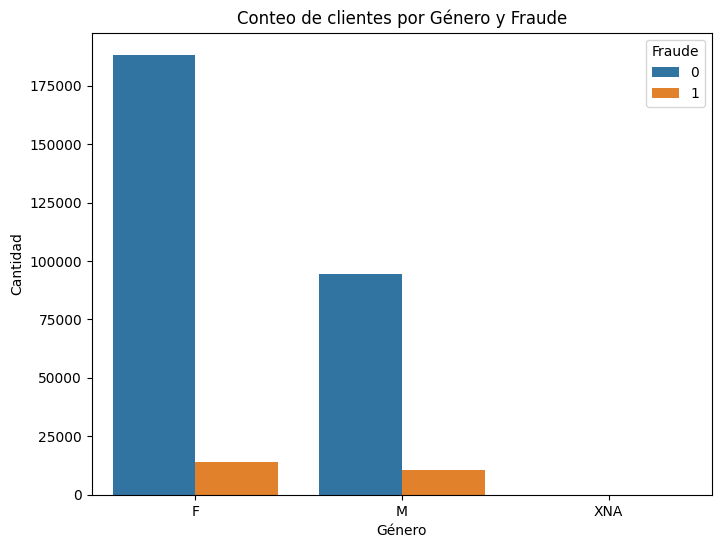

In [177]:
df_gender = df.groupby(["CODE_GENDER", "TARGET"])["TARGET"].count().reset_index(name="count")

# Hacemos el barplot
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_gender,
    x="CODE_GENDER",
    y="count",
    hue="TARGET"   
)
plt.title("Conteo de clientes por Género y Fraude")
plt.ylabel("Cantidad")
plt.xlabel("Género")
plt.legend(title='Fraude', loc='upper right')
plt.show()

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_35312\4206587999.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_count = df_age.groupby(['AGE_BIN','TARGET'])['TARGET'].count().reset_index(name="count")


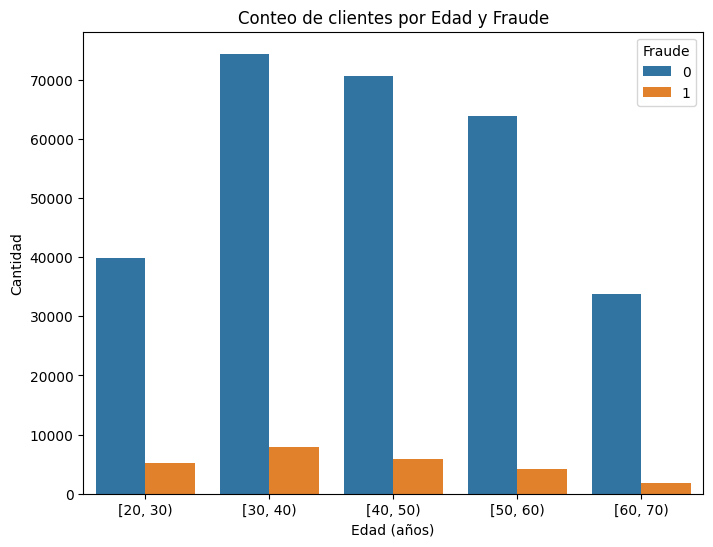

In [178]:
df_age = df[['DAYS_BIRTH','TARGET']].copy()
df_age['YEARS_BIRTH'] = (df_age['DAYS_BIRTH'] / -365).astype(int)
df_age.drop(columns='DAYS_BIRTH')
df_age['AGE_BIN'] = pd.cut(df_age['YEARS_BIRTH'], bins=range(df_age['YEARS_BIRTH'].min(), round(df_age['YEARS_BIRTH'].max(),-1)+1, 10), right=False)
df_age_count = df_age.groupby(['AGE_BIN','TARGET'])['TARGET'].count().reset_index(name="count")


# Hacemos el barplot
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_age_count,
    x="AGE_BIN",
    y="count",
    hue="TARGET",
)
plt.title("Conteo de clientes por Edad y Fraude")
plt.ylabel("Cantidad")
plt.xlabel("Edad (años)")
plt.legend(title='Fraude', loc='upper right')
plt.show()

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_35312\1216531271.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_emp_years_count = df_emp.groupby(['YEARS_BIN','TARGET'])['TARGET'].count().reset_index(name="count")


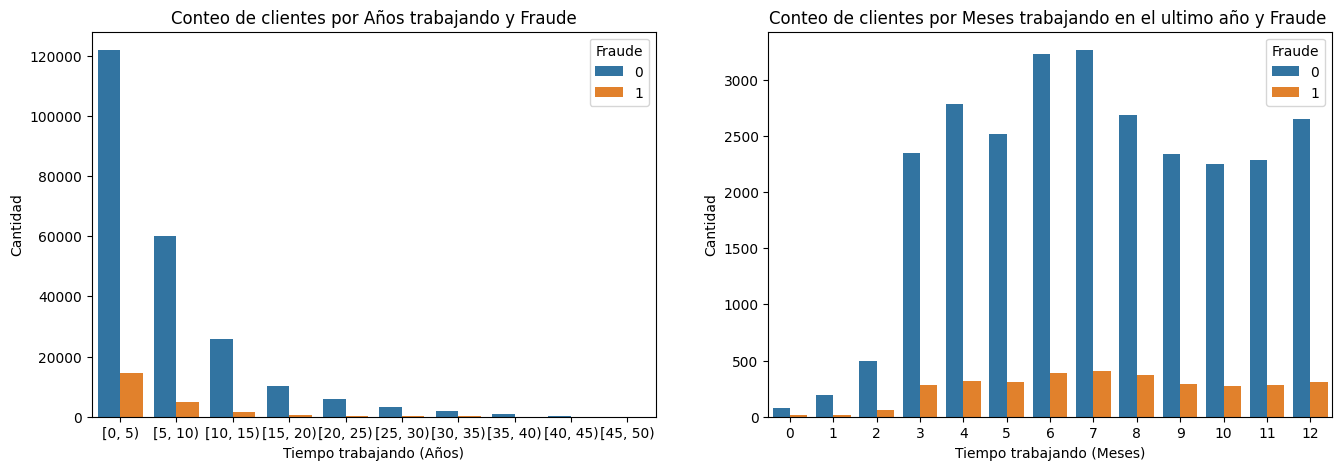

In [179]:
df_emp = df[['DAYS_EMPLOYED','TARGET']].copy()
df_emp['YEARS_EMPLOYED'] = (df_emp['DAYS_EMPLOYED'] / -365).astype(int)
df_emp['MONTHS_EMPLOYED'] = (df_emp['DAYS_EMPLOYED'] / -30).astype(int)
df_emp = df_emp[df_emp['DAYS_EMPLOYED'] != 0]
df_emp['YEARS_BIN'] = pd.cut(df_emp['YEARS_EMPLOYED'], bins=range(df_emp['YEARS_EMPLOYED'].min(), round(df_emp['YEARS_EMPLOYED'].max(),-1)+1, 5), right=False)


df_emp_years_count = df_emp.groupby(['YEARS_BIN','TARGET'])['TARGET'].count().reset_index(name="count")
df_emp_months_count = df_emp.groupby(['MONTHS_EMPLOYED','TARGET'])['TARGET'].count().reset_index(name="count")
# Hacemos el barplot
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
sns.barplot(ax=ax1,
    data=df_emp_years_count,
    x="YEARS_BIN",
    y="count",
    hue="TARGET",
)
ax1.set_title("Conteo de clientes por Años trabajando y Fraude")
ax1.set_ylabel("Cantidad")
ax1.set_xlabel("Tiempo trabajando (Años)")
ax1.legend(title='Fraude', loc='upper right')


ax2 = fig.add_subplot(1,2,2)
sns.barplot(ax=ax2,
    data=df_emp_months_count[df_emp_months_count['MONTHS_EMPLOYED'] <= 12],
    x="MONTHS_EMPLOYED",
    y="count",
    hue="TARGET",
)
ax2.set_title("Conteo de clientes por Meses trabajando en el ultimo año y Fraude ")
ax2.set_ylabel("Cantidad")
ax2.set_xlabel("Tiempo trabajando (Meses)")
ax2.legend(title='Fraude', loc='upper right')

plt.show()

In [180]:
df_emp2_count

,IS_EMPLOYED,TARGET,count
0,0,0,52384
1,0,1,2990
2,1,0,230302
3,1,1,21835


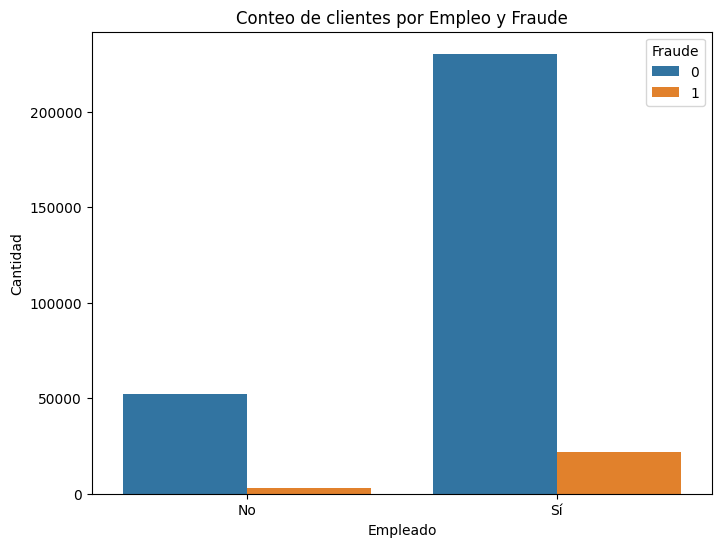

In [181]:
df_emp2 = df[['IS_EMPLOYED','TARGET']].copy()
df_emp2_count = df_emp2.groupby(['IS_EMPLOYED','TARGET'])['TARGET'].count().reset_index(name="count")

# Hacemos el barplot
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_emp2_count,
    x="IS_EMPLOYED",
    y="count",
    hue="TARGET",
)
plt.title("Conteo de clientes por Empleo y Fraude")
plt.ylabel("Cantidad")
plt.xlabel("Empleado")
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.legend(title='Fraude', loc='upper right')
plt.show()

In [182]:
data2 = df[df['AMT_INCOME_TOTAL']<50000000]

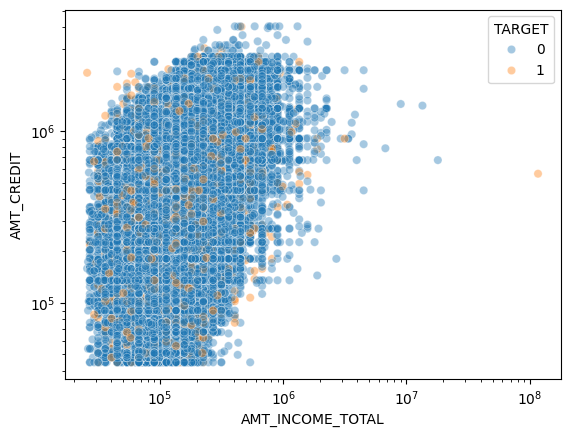

In [192]:
sns.scatterplot(data=df, x="AMT_INCOME_TOTAL", y="AMT_CREDIT", hue="TARGET", alpha=0.4)
plt.xscale('log')
plt.yscale("log")

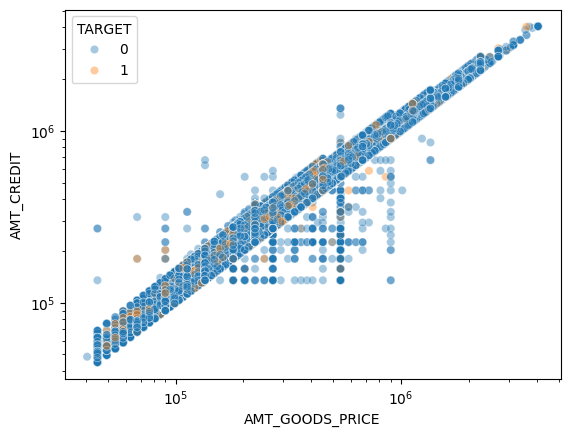

In [193]:
sns.scatterplot(
    data=df, x="AMT_GOODS_PRICE", y="AMT_CREDIT", hue="TARGET", alpha=0.4
)
plt.xscale('log')
plt.yscale("log")

<Axes: xlabel='TARGET', ylabel='AMT_CREDIT'>

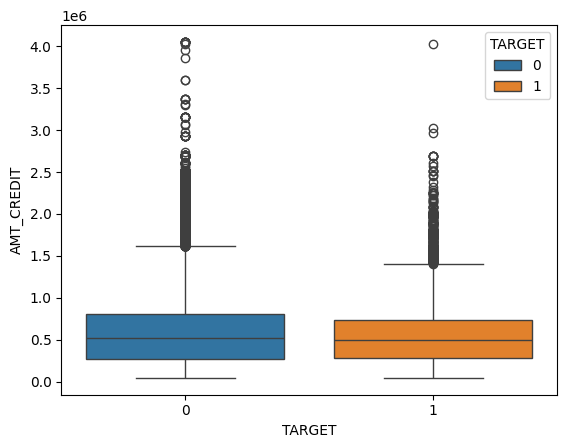

In [185]:
sns.boxplot(data=df, x = 'TARGET',y='AMT_CREDIT',hue='TARGET')

In [186]:
sorted(df['AMT_INCOME_TOTAL'].unique(),reverse=True)[:5]

[117000000.0, 18000090.0, 13500000.0, 9000000.0, 6750000.0]

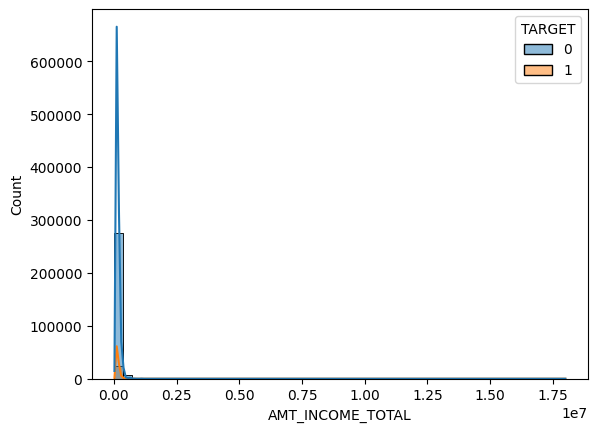

In [187]:
df_filtered = df[df['AMT_INCOME_TOTAL'] < df['AMT_INCOME_TOTAL'].max()]
sns.histplot(data=df_filtered, x='AMT_INCOME_TOTAL', bins = 50,kde=True,hue='TARGET')
plt.show()

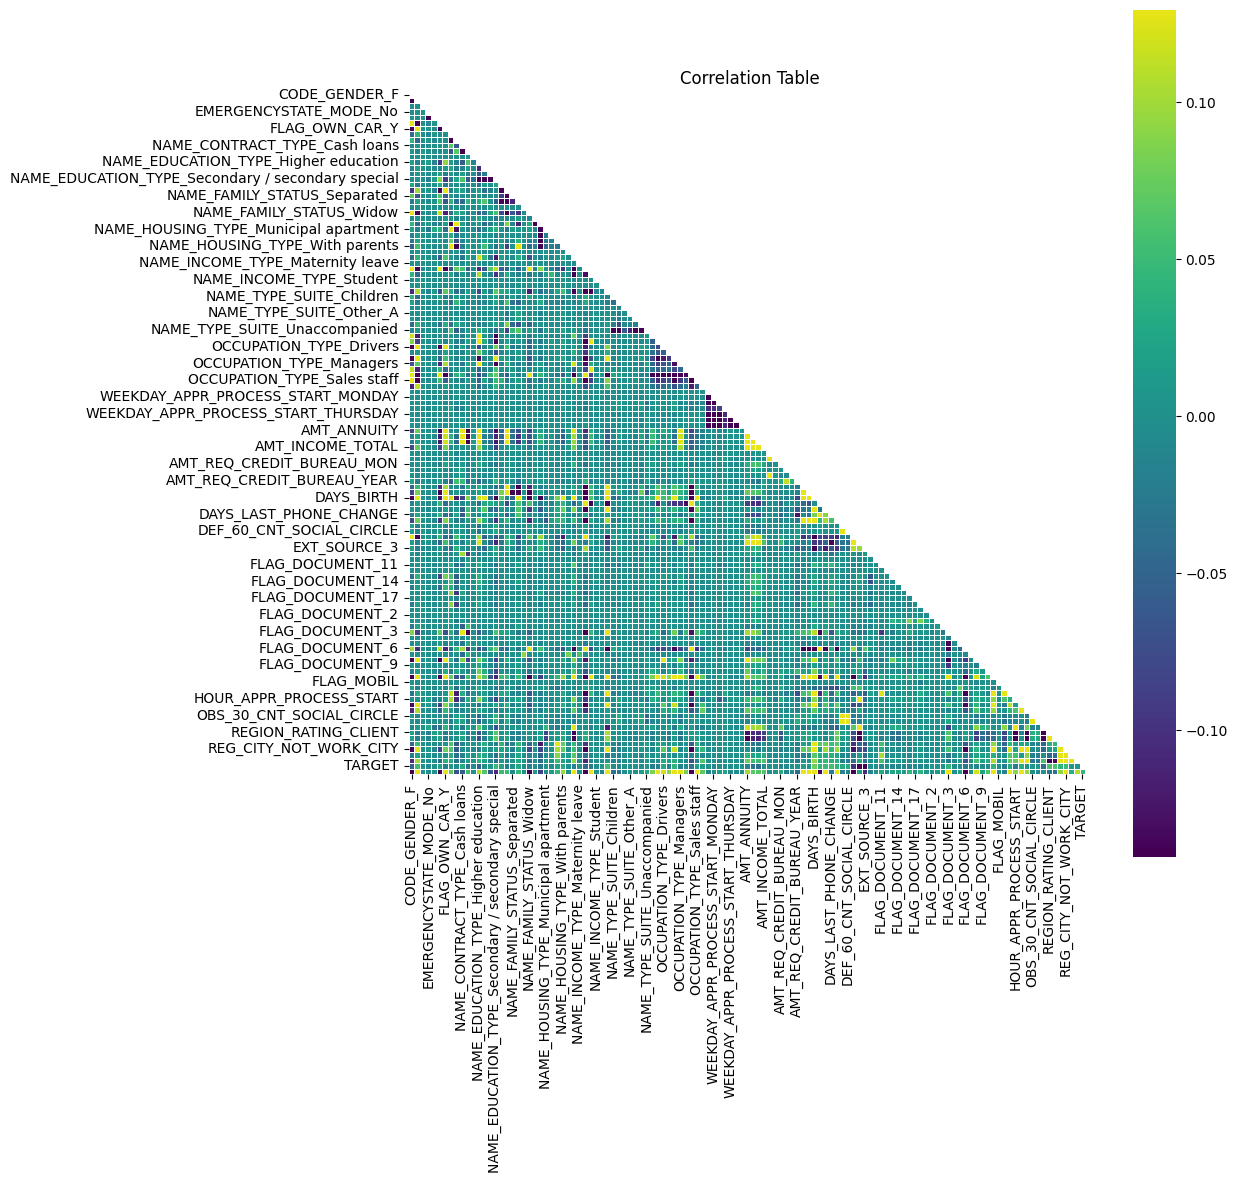

In [188]:
plt.figure(figsize = (11,11))
corr = df_processed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, cmap="viridis",linewidths = .6)
plt.title('Correlation Table')
plt.show()

In [189]:
df_processed.corr()['TARGET'][:-1].abs().sort_values().tail(20)

FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
DAYS_EMPLOYED                                        0.046052
NAME_INCOME_TYPE_Pensioner                           0.046209
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_F                                        0.054704
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_EDUCATION_TYPE_Higher education                 0.056593
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
EXT_SOUR

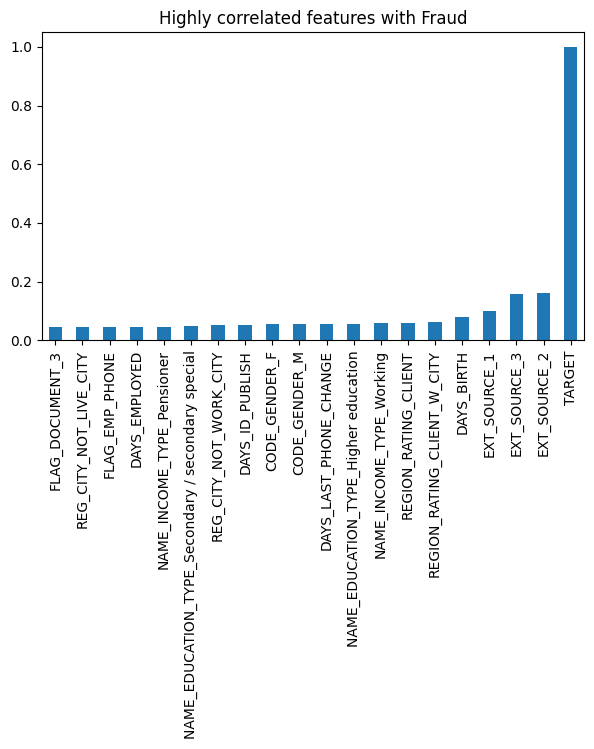

In [190]:
plt.figure(figsize=(7,4))
d = df_processed.corr()['TARGET'][:-1].abs().sort_values().tail(20).plot(kind='bar', title='Highly correlated features with Fraud')